In [21]:
import json
import pandas as pd

DATA_PATH = '../data/1832_v4_preprocessed.csv'
SANKEY_PATH = '../data/sankey_oj.json'
SANKEY_NORMALIZED_PATH = '../data/sankey_oj_normalized.json'
SANKEY_BINARY_PATH = '../data/sankey_oj_binary.json'
SANKEY_DDO_PATH = '../data/sankey_ddo.json'
SANKEY_SDOJ_PATH = '../data/sankey_sdoj.json'

## **Origin Job**

In [2]:
rec = pd.read_csv(DATA_PATH)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


In [3]:
# Keep TOP_N most populated chef_origine_class 
TOP_N = 5

top_origins = rec['chef_origine_class'].value_counts().head(TOP_N).index.tolist()
rec['chef_origine_class'] = rec['chef_origine_class'].apply(lambda x: x if x in top_origins else 'Other')

# Delete Other entries
rec = rec[rec['chef_origine_class'] != 'Other']
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
5,marterey,3,1802.0,lutry,NaN,garcon voiturier,1,1,NaN,lavaux,culture,marterey
8,marterey,3,1787.0,lausanne,NaN,rentier,1,1,rente,lausanne,culture,marterey
9,marterey,3,1787.0,lausanne,NaN,rentier,1,1,rente,lausanne,culture,marterey
10,marterey,3,NaN,saint-saphorin,1784.0,garde arsenal,1,1,NaN,lavaux,culture,marterey


In [4]:
rec = rec.groupby(['chef_origine_class', 'chef_vocation_class']) \
    .agg({'chef_origine_class': 'count'}) \
    .rename(columns={'chef_origine_class': 'count'}) \
    .reset_index()

rec.head()

,chef_origine_class,chef_vocation_class,count
0,france,administration,1
1,france,agricole,20
2,france,artisanat,16
3,france,commerce,7
4,france,construction,1


In [5]:
data = []

# for each entry put source target and value
for index, row in rec.iterrows():
    data.append({
        'source': row['chef_origine_class'],
        'target': row['chef_vocation_class'],
        'value': row['count']
    })

In [6]:
# Save data
with open(SANKEY_PATH, 'w') as f:
    json.dump(data, f, indent=4)

## **Origin Job Normalized**

In [7]:
rec = pd.read_csv(DATA_PATH)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


In [8]:
# Keep TOP_N most populated chef_origine_class 
TOP_N = 5

top_origins = rec['chef_origine_class'].value_counts().head(TOP_N).index.tolist()
rec['chef_origine_class'] = rec['chef_origine_class'].apply(lambda x: x if x in top_origins else 'Other')

# Delete Other entries
rec = rec[rec['chef_origine_class'] != 'Other']
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
5,marterey,3,1802.0,lutry,NaN,garcon voiturier,1,1,NaN,lavaux,culture,marterey
8,marterey,3,1787.0,lausanne,NaN,rentier,1,1,rente,lausanne,culture,marterey
9,marterey,3,1787.0,lausanne,NaN,rentier,1,1,rente,lausanne,culture,marterey
10,marterey,3,NaN,saint-saphorin,1784.0,garde arsenal,1,1,NaN,lavaux,culture,marterey


In [9]:
rec = rec.groupby(['chef_origine_class', 'chef_vocation_class']) \
    .agg({'chef_origine_class': 'count'}) \
    .rename(columns={'chef_origine_class': 'count'}) \
    .reset_index()

rec.head()

,chef_origine_class,chef_vocation_class,count
0,france,administration,1
1,france,agricole,20
2,france,artisanat,16
3,france,commerce,7
4,france,construction,1


In [10]:
rec_sum = rec.groupby(['chef_origine_class']) \
    .agg({'count': 'sum'}) \
    .rename(columns={'count': 'sum'}) \
    .reset_index()

rec_sum.head()

,chef_origine_class,sum
0,france,98
1,lausanne,902
2,lavaux,207
3,morges,140
4,suisse_allemande,150


In [11]:
# Normalize
rec = rec.merge(rec_sum, on='chef_origine_class')
rec['count'] = rec['count'] / rec['sum']
rec = rec.drop(columns=['sum'])

In [12]:
data = []

# for each entry put source target and value
for index, row in rec.iterrows():
    data.append({
        'source': row['chef_origine_class'],
        'target': row['chef_vocation_class'],
        'value': row['count']
    })

In [13]:
# Save data
with open(SANKEY_NORMALIZED_PATH, 'w') as f:
    json.dump(data, f, indent=4)

## **Binary**

In [14]:
rec = pd.read_csv(DATA_PATH)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


In [15]:
rec.loc[rec['chef_origine_class'] != 'lausanne', 'chef_origine_class'] = 'hors_lausanne'

In [16]:
rec = rec.groupby(['chef_origine_class', 'chef_vocation_class']) \
    .agg({'chef_origine_class': 'count'}) \
    .rename(columns={'chef_origine_class': 'count'}) \
    .reset_index()

rec.head()

,chef_origine_class,chef_vocation_class,count
0,hors_lausanne,administration,49
1,hors_lausanne,agricole,389
2,hors_lausanne,artisanat,536
3,hors_lausanne,commerce,174
4,hors_lausanne,construction,199


In [17]:
rec_sum = rec.groupby(['chef_origine_class']) \
    .agg({'count': 'sum'}) \
    .rename(columns={'count': 'sum'}) \
    .reset_index()

rec_sum.head()

,chef_origine_class,sum
0,hors_lausanne,2060
1,lausanne,902


In [18]:
# Normalize
rec = rec.merge(rec_sum, on='chef_origine_class')
rec['count'] = rec['count'] / rec['sum']
rec = rec.drop(columns=['sum'])

In [19]:
data = []

# for each entry put source target and value
for index, row in rec.iterrows():
    data.append({
        'source': row['chef_origine_class'],
        'target': row['chef_vocation_class'],
        'value': row['count']
    })

In [20]:
# Save data
with open(SANKEY_BINARY_PATH, 'w') as f:
    json.dump(data, f, indent=4)

## **Section - Division - Job**

In [2]:
rec = pd.read_csv(DATA_PATH)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


In [3]:
rec_dd = rec.copy()
rec_dd = rec_dd.groupby(['division_class', 'division_name']) \
    .agg({'division_name': 'count'}) \
    .rename(columns={'division_name': 'count'}) \
    .reset_index()

rec_dd.head()

,division_class,division_name,count
0,affaires,bourg,200
1,affaires,place_st_francois,193
2,campagne,chailly,69
3,campagne,grange_neuve,35
4,campagne,la_sallaz,87


In [4]:
data = []

# for each entry put source target and value
for index, row in rec_dd.iterrows():
    data.append({
        'source': row['division_name'],
        'target': row['division_class'] + '_division',
        'value': row['count']
    })

In [5]:
rec_dj = rec.copy()
rec_dj = rec_dj.groupby(['division_class', 'chef_vocation_class']) \
    .agg({'chef_vocation_class': 'count'}) \
    .rename(columns={'chef_vocation_class': 'count'}) \
    .reset_index()

rec_dj.head()

,division_class,chef_vocation_class,count
0,affaires,administration,7
1,affaires,agricole,10
2,affaires,artisanat,54
3,affaires,commerce,43
4,affaires,construction,7


In [6]:
for index, row in rec_dj.iterrows():
    data.append({
        'source': row['division_class'] + '_division',
        'target': row['chef_vocation_class'],
        'value': row['count']
    })

In [26]:
# Save data
with open(SANKEY_DDJ_PATH, 'w') as f:
    json.dump(data, f, indent=4)

## **Section - Division - Binary Origin - Job**

In [22]:
rec = pd.read_csv(DATA_PATH)
rec.head()

,nom_rue,no_maison,chef_annee_naissance,chef_origine,chef_annee_arrivee,chef_vocation,page,division,chef_vocation_class,chef_origine_class,division_class,division_name
0,marterey,1,1764.0,tolochenaz,1786.0,charon,1,1,NaN,morges,culture,marterey
1,marterey,2,NaN,rolle,1821.0,marechal-ferrant,1,1,artisanat,rolle,culture,marterey
2,marterey,3,1785.0,pailly,NaN,lingere,1,1,service,moudon,culture,marterey
3,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey
4,marterey,3,NaN,gingins,NaN,rentier,1,1,rente,NaN,culture,marterey


<Axes: >

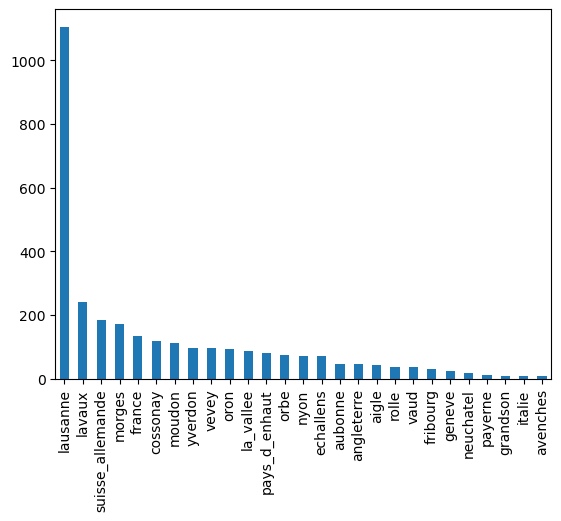

In [23]:
# bar plot of chef_origine_class
rec['chef_origine_class'].value_counts().plot(kind='bar')

In [24]:
rec_dd = rec.copy()
rec_dd = rec_dd.groupby(['division_class', 'division_name']) \
    .agg({'division_name': 'count'}) \
    .rename(columns={'division_name': 'count'}) \
    .reset_index()

rec_dd.head()

,division_class,division_name,count
0,affaires,bourg,200
1,affaires,place_st_francois,193
2,campagne,chailly,69
3,campagne,grange_neuve,35
4,campagne,la_sallaz,87


In [25]:
data = []

# for each entry put source target and value
for index, row in rec_dd.iterrows():
    data.append({
        'source': row['division_name'],
        'target': row['division_class'] + '_division',
        'value': row['count']
    })

In [26]:
rec_dj = rec.copy()
# Delete entries with nan chef_origin_class
rec_dj = rec_dj[rec_dj['chef_origine_class'].notna()]
# Binary: lausanne, hors_lausanne
rec_dj.loc[rec_dj['chef_origine_class'] != 'lausanne', 'chef_origine_class'] = 'hors_lausanne'
rec_dj = rec_dj.groupby(['division_class', 'chef_origine_class']) \
    .agg({'chef_origine_class': 'count'}) \
    .rename(columns={'chef_origine_class': 'count'}) \
    .reset_index()

rec_dj.head()

,division_class,chef_origine_class,count
0,affaires,hors_lausanne,192
1,affaires,lausanne,99
2,campagne,hors_lausanne,242
3,campagne,lausanne,230
4,cathedrale,hors_lausanne,325


In [27]:
for index, row in rec_dj.iterrows():
    data.append({
        'source': row['division_class'] + '_division',
        'target': row['chef_origine_class'],
        'value': row['count']
    })

In [28]:
rec_jo = rec.copy()
rec_jo.loc[rec_jo['chef_origine_class'] != 'lausanne', 'chef_origine_class'] = 'hors_lausanne'
rec_jo = rec_jo.groupby(['chef_origine_class', 'chef_vocation_class']) \
    .agg({'chef_origine_class': 'count'}) \
    .rename(columns={'chef_origine_class': 'count'}) \
    .reset_index()
rec_jo.head()

,chef_origine_class,chef_vocation_class,count
0,hors_lausanne,administration,49
1,hors_lausanne,agricole,389
2,hors_lausanne,artisanat,536
3,hors_lausanne,commerce,174
4,hors_lausanne,construction,199


In [29]:
for index, row in rec_jo.iterrows():
    data.append({
        'source': row['chef_origine_class'],
        'target': row['chef_vocation_class'],
        'value': row['count']
    })

In [30]:
# Save data
with open(SANKEY_SDOJ_PATH, 'w') as f:
    json.dump(data, f, indent=4)